# Project: Traffic Sign Recognition

---
## Overview
This Jupyter Notebook is the final report of final project of EECS 475 Machine Learning: Foundations, Algorithms and Applications conducted and written by Yian Su (YSO0488) and Erkin Oto (EOX6006). Our project proposal goes [here](./project-proposal.txt). The Youtube Video for this project can be viewed from [here](https://youtu.be/IjDnE2xLbNc). This project is originally created and matained by Udacity's [Self-Driving Car Engineer Nanodegrees Program](https://www.udacity.com/course/self-driving-car-engineer-nanodegree--nd013). We search, read, understand and reconduct this project based on the [tutorial](https://towardsdatascience.com/recognizing-traffic-signs-with-over-98-accuracy-using-deep-learning-86737aedc2ab) by Eddie Forson.

Below is how this final project is organized. In the first section, we give a quick **Introduction** of what this project is about and how it works. Then we write the **Dataset Exploration** section followed by **Data Preprocessing**. We then step into the **Model Construction** section at where we define the *SOLeNet* for this project. After that, in the **Training** section we run six training processes on the [Google Cloud Service](https://cloud.google.com/). In the end, we **Predict and Test** our best trained model on several new images and see how it performs.

---
## Introduction

Traffic signs are an essential part of our road infrastructure, given they give significant information for road users, which in turn requires drivers to react and adjust their driving behavior accordingly to make sure they adhere with whatever road regulation currently enforced. Autonomous vehicles must also abide by road legislation and therefore recognize and understand traffic signs. Normally, standard computer vision techniques were utilized to detect and classify traffic signs, which required a considerable amount of time and effort to extract the important features in images. Instead, we created a model using deep learning architecture that can identify traffic signs with a nearly 98% accuracy achieved on the test set. For this purpose, we have found a dataset and sorted them into three groups consisting of training set, validation set and test set. We have used Python 3.5 with Tensorflow to write our code.

---
## Dataset Exploration

In the Dataset Exploration Section, we first load the dataset from [German Traffic Sign Benchmark](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset). We then make a summary of the whole dataset, group images by class and plot the distribution of the training data. In the end, we visualize the training data by plotting 7 images from each class.

In [1]:
#### enable plot visualization
%matplotlib inline
from importlib import reload
import utils; reload(utils)
from utils import *

### 1 Load the dataset

In [2]:
#### import and read data
import pickle

datasets_path = "datasets/"
# models_path = "models/"

training_data = datasets_path + "train.p"
validation_data = datasets_path + "valid.p"
testing_data = datasets_path + "test.p"

with open(training_data, mode = 'rb') as file:
    train = pickle.load(file)
with open(validation_data, mode = 'rb') as file:
    valid = pickle.load(file)
with open(testing_data, mode = 'rb') as file:
    test = pickle.load(file)
    
x_train, y_train = train['features'], train['labels']
x_valid, y_valid = valid['features'], valid['labels']
x_test, y_test = test['features'], test['labels']

### 2 Summary of the dataset

In [3]:
#### dimensions of training, validation and testing data
number_train = x_train.shape[0]
number_valid = x_valid.shape[0]
number_test = x_test.shape[0]
number_class = len(set(y_train))
image_shape = x_train.shape[1:]

print("number of training images = ", number_train)
print("number of validation images = ", number_valid)
print("number of testing images = ", number_test)
print("number of classes = ", number_class)
print("shape of each image = ", image_shape)

number of training images =  34799
number of validation images =  4410
number of testing images =  12630
number of classes =  43
shape of each image =  (32, 32, 3)


### 3 Group images by class

In [4]:
#### load mapping file
import pandas as pd

sign_names = pd.read_csv("signnames.csv")
sign_names.set_index("ClassId")

sign_names.head(5)

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


In [5]:
#### map training, validation and testing data from label to name
x_train_label_to_name = label_to_name(y_train, sign_names)
x_valid_label_to_name = label_to_name(y_valid, sign_names)
x_test_label_to_name = label_to_name(y_test, sign_names)

x_train_label_to_name.head(5)

,id,label,name
0,0,41,End of no passing
1,1,41,End of no passing
2,2,41,End of no passing
3,3,41,End of no passing
4,4,41,End of no passing


In [6]:
#### group training, validation and testing data into counts
x_train_label_count = label_count(x_train_label_to_name)
x_valid_label_count = label_count(x_valid_label_to_name)
x_test_label_count = label_count(x_test_label_to_name)

x_train_label_count.head(5)

,,id
label,name,
0,Speed limit (20km/h),180
1,Speed limit (30km/h),1980
2,Speed limit (50km/h),2010
3,Speed limit (60km/h),1260
4,Speed limit (70km/h),1770


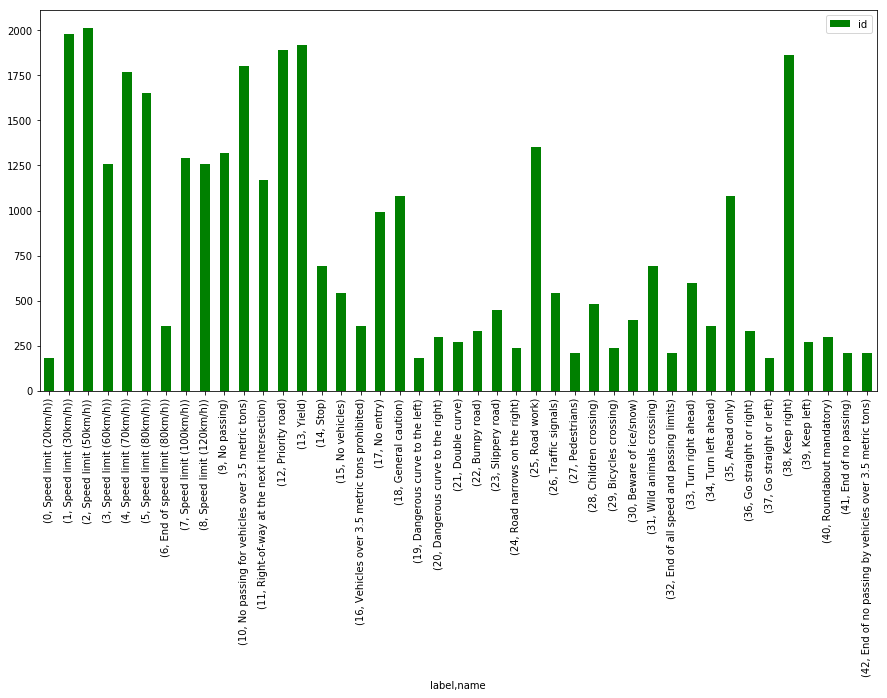

In [7]:
#### visualize the distribution of training data
x_train_label_count.plot(kind = 'bar', color = 'green', figsize = (15, 7))

### 4 Visualize the Dataset

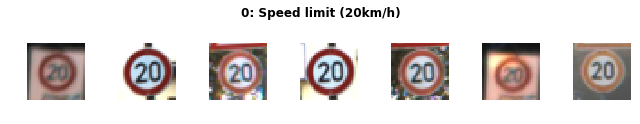

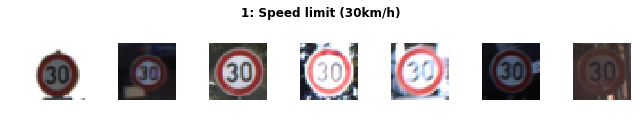

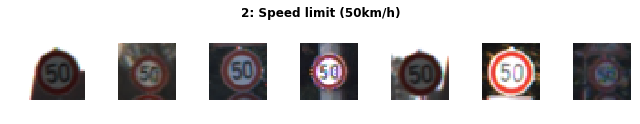

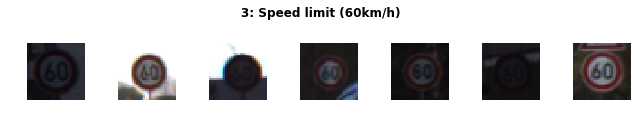

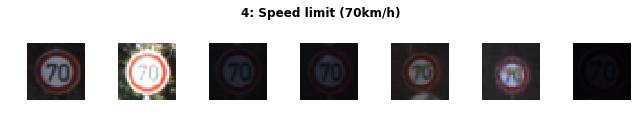

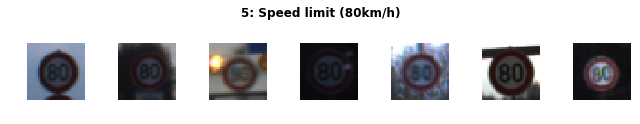

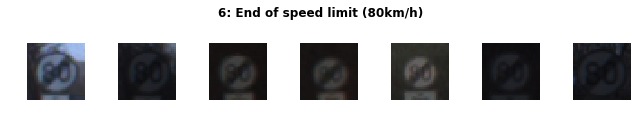

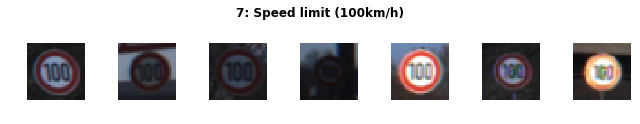

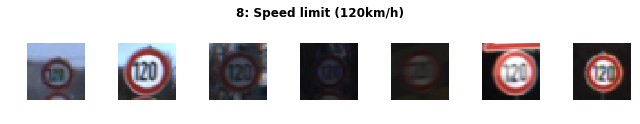

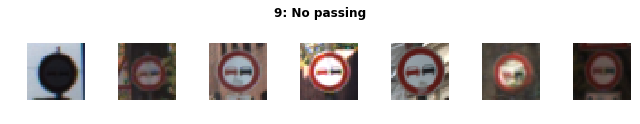

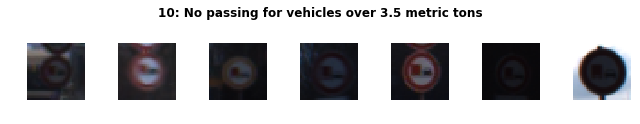

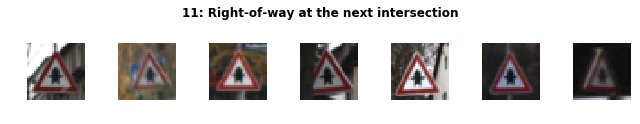

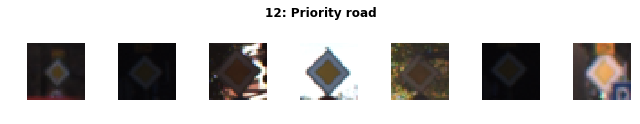

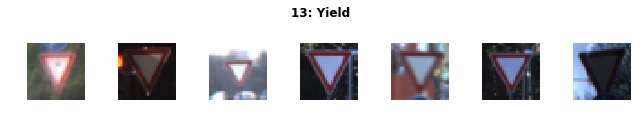

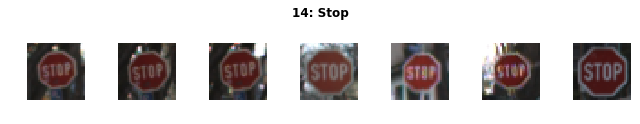

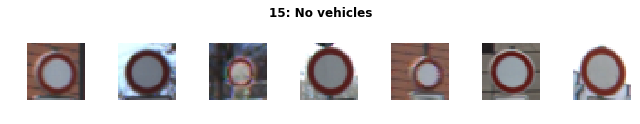

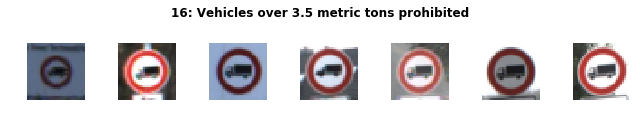

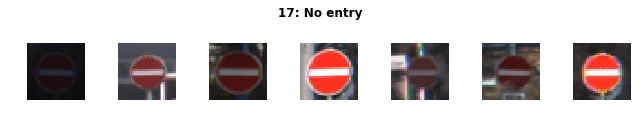

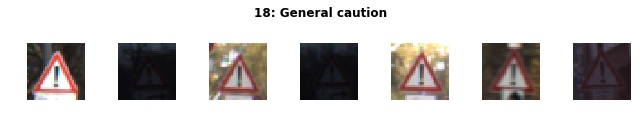

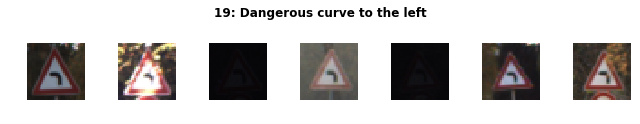

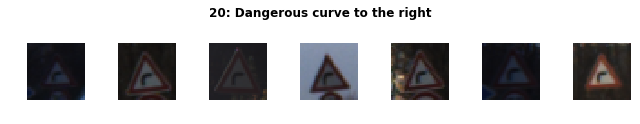

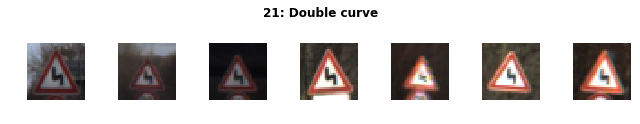

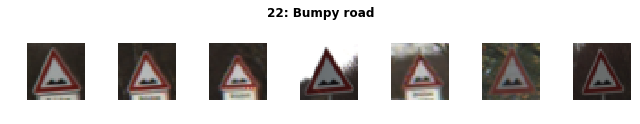

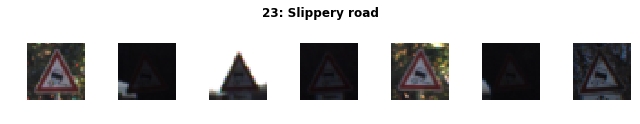

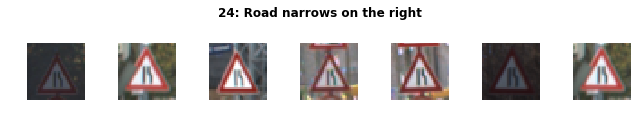

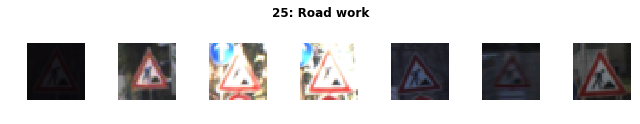

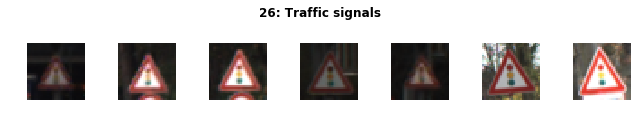

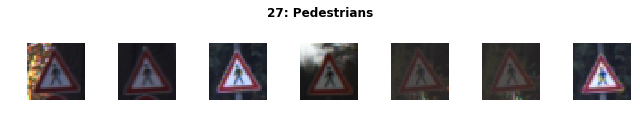

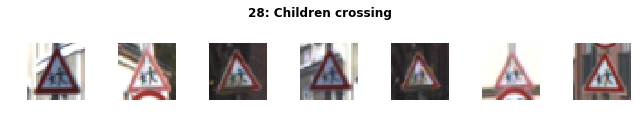

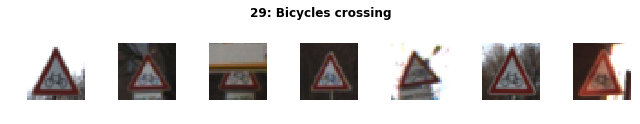

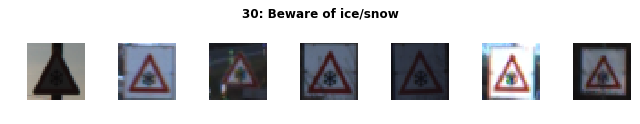

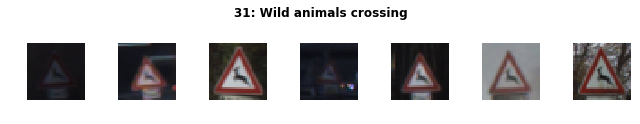

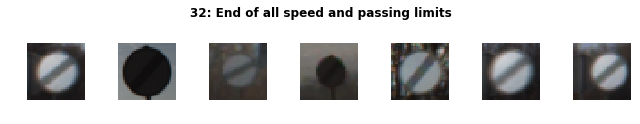

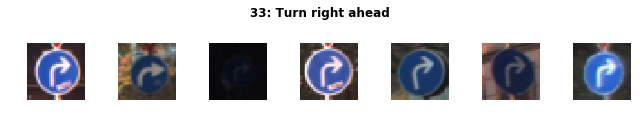

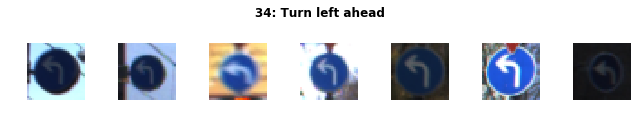

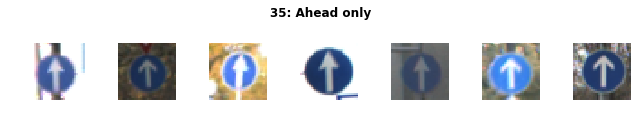

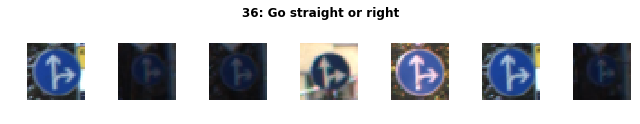

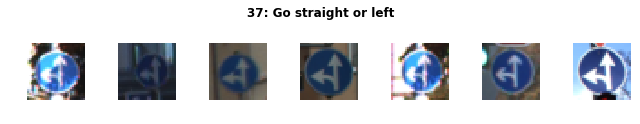

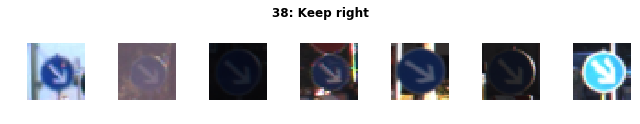

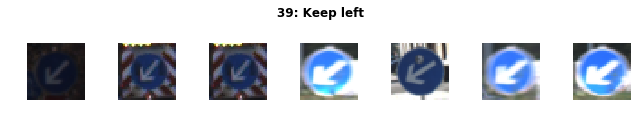

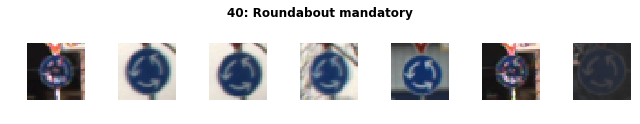

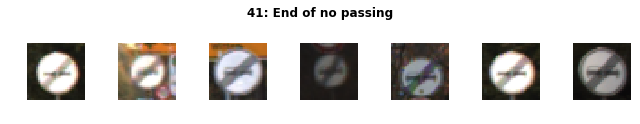

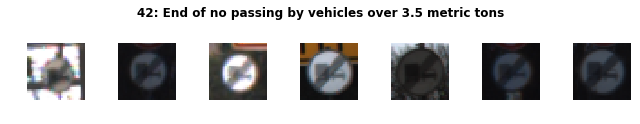

In [8]:
#### random show 7 images for each class
x_train_group = x_train_label_to_name.groupby(["label", "name"])
show_random_dataset_images(x_train_group, x_train)

---
## Data Preprocessing

In this section, we perform data preprocessing on all training, validation and testing data. The main preprocessing techniques we use is **Image Grayscale** and **Standard Normalization**.

### 1 Grayscale Image

In [9]:
#### grayscale training, testing and testing images
x_train_grayscale = np.asarray(list(map(lambda img: grayscale(img), x_train)))
x_valid_grayscale = np.asarray(list(map(lambda img: grayscale(img), x_valid)))
x_test_grayscale = np.asarray(list(map(lambda img: grayscale(img), x_test)))

x_train_grayscale = np.reshape(x_train_grayscale, (x_train_grayscale.shape[0], 32, 32, 1))
x_valid_grayscale = np.reshape(x_valid_grayscale, (x_valid_grayscale.shape[0], 32, 32, 1))
x_test_grayscale = np.reshape(x_test_grayscale, (x_test_grayscale.shape[0], 32, 32, 1))

### 2 Image Normalization

In [10]:
#### standard normalize training, validation and testing images
x_train_grayscale_normalized = standard_normalization(x_train_grayscale, x_train_grayscale)
x_valid_grayscale_normalized = standard_normalization(x_valid_grayscale, x_train_grayscale)
x_test_grayscale_normalized = standard_normalization(x_test_grayscale, x_train_grayscale)

### 3 Visualize the Dataset after processing

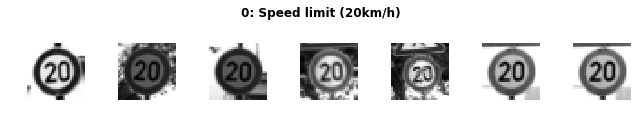

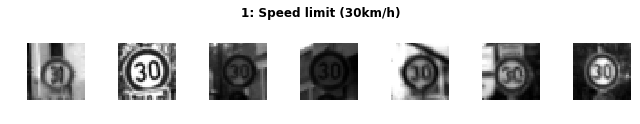

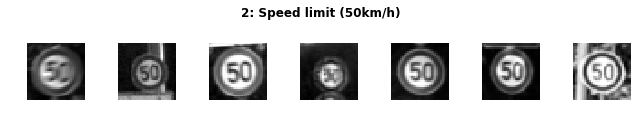

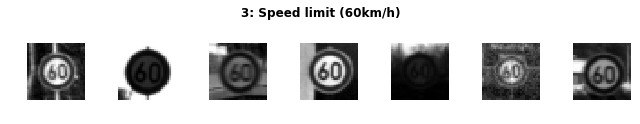

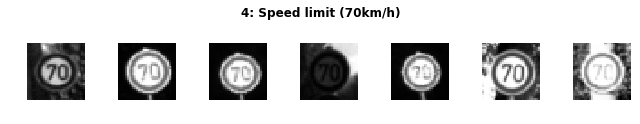

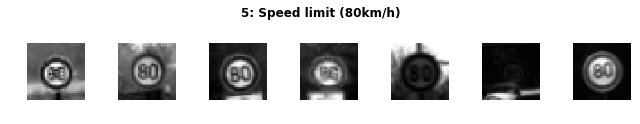

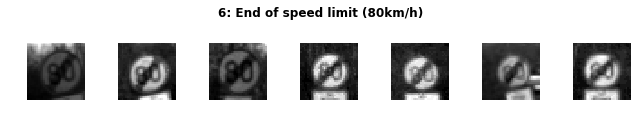

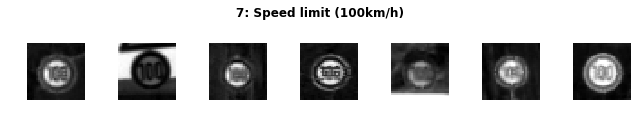

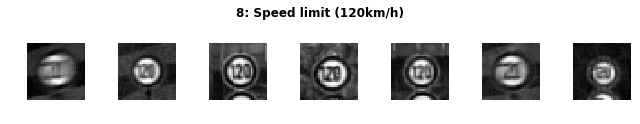

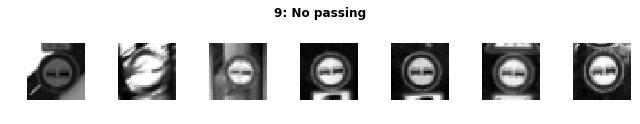

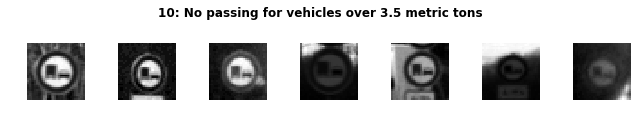

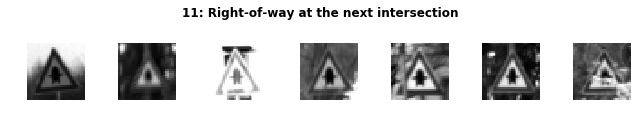

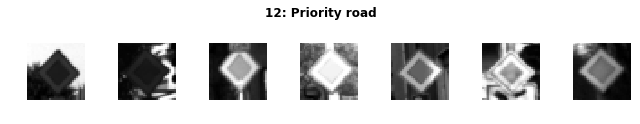

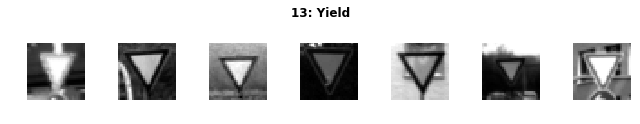

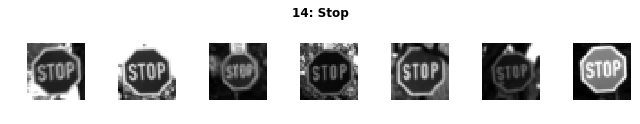

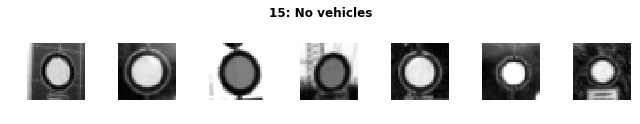

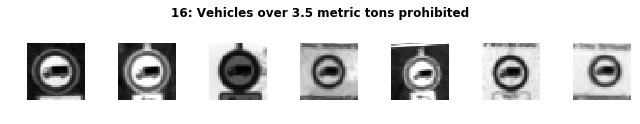

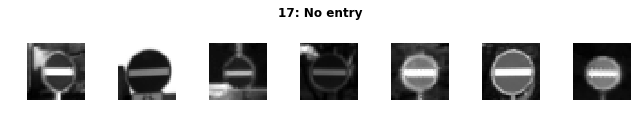

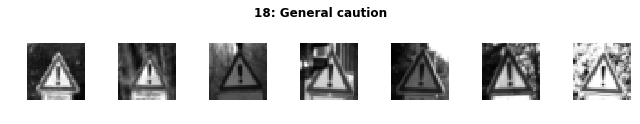

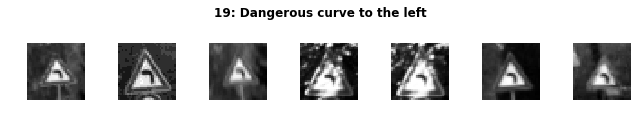

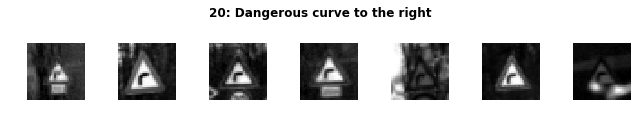

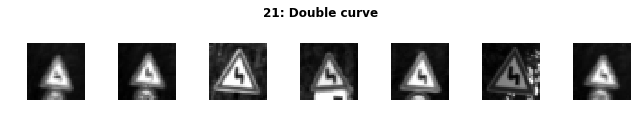

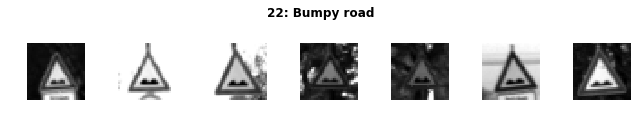

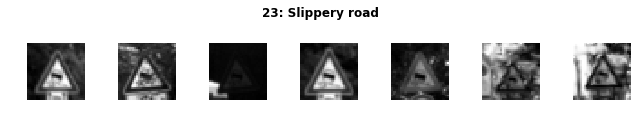

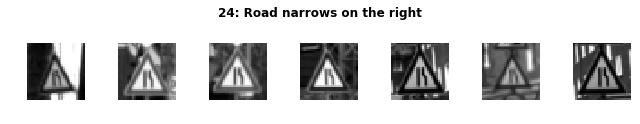

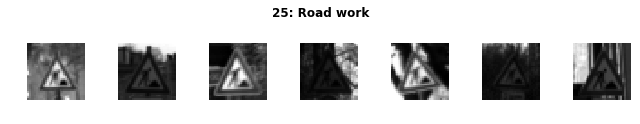

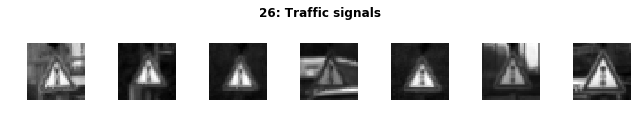

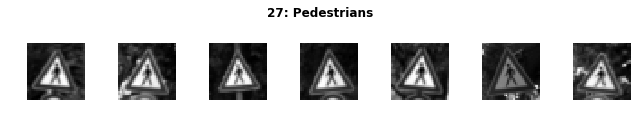

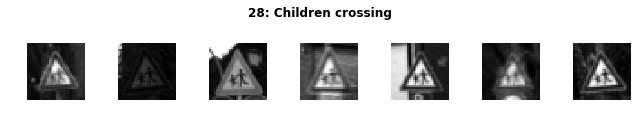

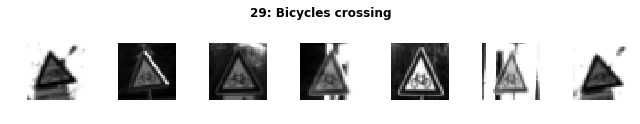

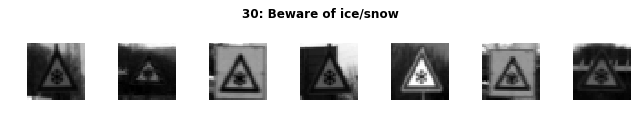

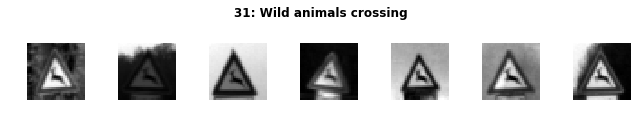

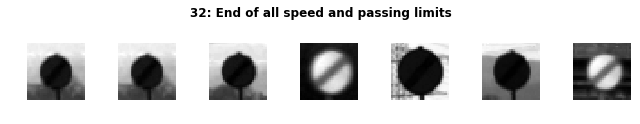

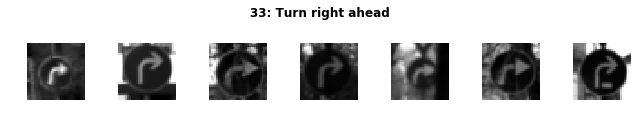

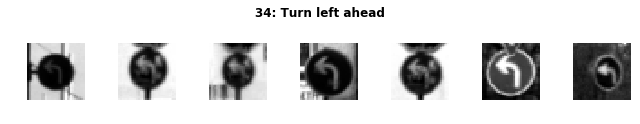

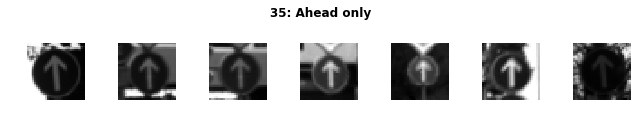

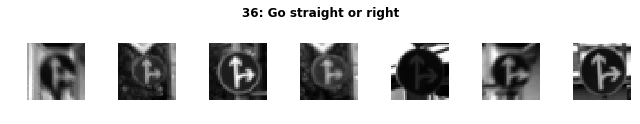

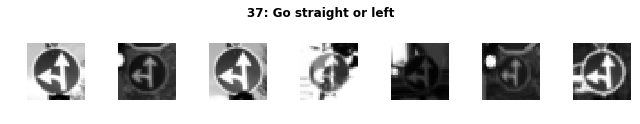

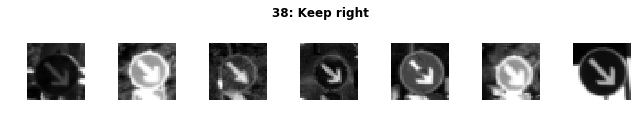

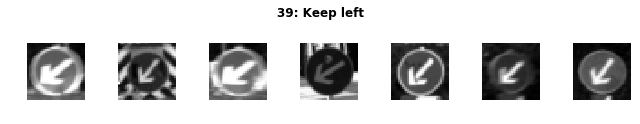

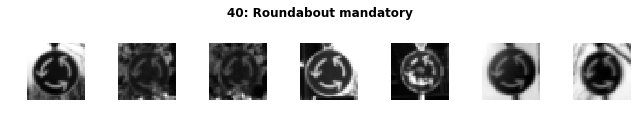

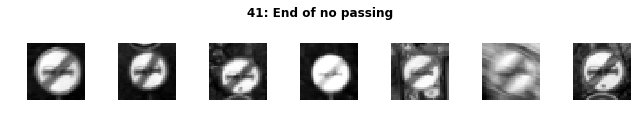

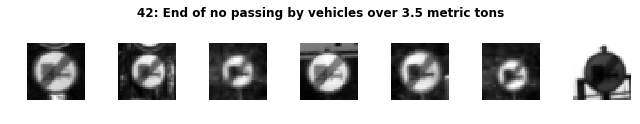

In [11]:
#### random show 10 grayscale and normalized images for each class
show_random_dataset_images(x_train_group, x_train_grayscale_normalized)

---
## Model Construction

In this section, we define the training pipeline by createing a ModelConfig and ModelExecutor class for training the deep neural network. The construction of this network is inspired and based on Yann Le Cun’s [paper](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf) on classification of traffic signs with some modifications, we name this neural network *SOLetNet*.

In [12]:
#### import predefined ModelConfig and ModelExecutor and SOLeNet
import modelconfig; reload(modelconfig)
import modelexecutor; reload(modelexecutor)
import solenet; reload(solenet)
from modelconfig import ModelConfig
from modelexecutor import ModelExecutor
from solenet import *

---
## Training

Due to the time consuming training process, instead of running all trainings in the Jupyter Notebook, we setup a [Google Cloud Platform](https://cloud.google.com/) instance to do the training and collect the final results as saved models and screenshots once they become available. We then run our best model in Jupyther Notebook and plot the training results by the end of this section.

### 1 Color, Normalized Dataset without Dropout
![image](training-results/SOLeNet_Color_Normalized_3x3.png)

We started with colored, normalized dataset without dropout and achieved an accuracy of 92.8% on the validation dataset and an accuracy of 92.6% on the test dataset. However, the loss values of the validation set pointed out that there was an overfitting problem. So we decided to add dropout in the following training process.

### 2 Color, Normalized Dataset with 25% Dropout
![image](training-results/SOLeNet_Color_Normalized_3x3_Dropout_0.25.png)

We chose a 25% dropout on both the convolutional and fully connected layers to see if we will be able to abstain from the overfitting problem. For the colored and normalized dataset, with 25% dropout, we achieved a validation set accuracy of 98.5% and a test set accuracy of 97.3%. The loss values for the validation dataset revealed that the overfitting problem was resolved.

### 3 Color, Normalized Dataset with 50% Dropout
![image](training-results/SOLeNet_Color_Normalized_3x3_Dropout_0.5.png)

We finally decided to check whether a dropout of 50% would give us a higher accurarcy and better result. However, 50% dropout gave us a lower accuracy of 97.1% for the validation dataset whereas 96% for the test dataset, which means the model is now not complex enough to fit and predict the data.

### 4 Grayscale, Normalized Dataset without Dropout
![image](training-results/SOLeNet_Grayscale_Normalized_3x3.png)

Similar to what we did with the colored dataset, for this run of training, we trained on grayscale and normalized dataset without dropout. Undoubtedly, the grayscale dataset without any dropout experienced overfitting, and produced a validation accuracy of 92.4% and test accuracy of 93.2%.

### 5 Grayscale, Normalized Dataset with 25% Dropout
![image](training-results/SOLeNet_Grayscale_Normalized_3x3_Dropout_0.25.png)

We then applied a 25% dropout to both the convolutional and fully connected layers and obtained a validation accuracy of 98.6% and a test accuracy of 97.3%, which is the best result we ever get. And also, the overfitting problem was solved.

### 6 Grayscale, Normalized Dataset with 50% Dropout
![image](training-results/SOLeNet_Grayscale_Normalized_3x3_Dropout_0.50.png)

In our last run, we used a 50% dropout to see if the accuracy was going to increase. Surprisingly, we obtained a higher validation accuracy of 98.8%, however our test accuracy was less compared to 25% dropout, which is 96.4%.

### 7 Rerun Grayscale, Normalized Dataset with 25% Dropout in the Jupyther Notebook

In [13]:
#### definition for ModelConfig and ModelExecutor
MC_3x3_25 = ModelConfig(SOLeNet, "SOLeNet_Grayscale_Normalized_3x3_Dropout_0.25", [32, 32, 1], [3, 32, 3], [120, 84], number_class, [0.75, 0.75])
ME_Grayscale_Normalized_3x3_25 = ModelExecutor(MC_3x3_25)

[SOLeNet] Building neural network [conv layers=3, conv filter size=3, conv start depth=32, fc layers=2]
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [14]:
#### train and test the model
(MC_3x3_25_Training_Metrics, MC_3x3_25_Validation_Metrics, MC_3x3_25_Duration) = ME_Grayscale_Normalized_3x3_25.train_model(x_train_grayscale_normalized, y_train, x_valid_grayscale_normalized, y_valid, epochs=100)
(MC_3x3_25_Testing_Accuracy, MC_3x3_25_Testing_Loss, MC_3x3_25_Testing_Duration) =  ME_Grayscale_Normalized_3x3_25.test_model(x_test_grayscale_normalized, y_test)

Training SOLeNet_Grayscale_Normalized_3x3_Dropout_0.25 [epochs=100, batch_size=512]...

[1]	total=63.347s | train: time=36.576s, loss=3.2565, acc=0.1844 | val: time=26.771s, loss=3.3605, acc=0.1435
[10]	total=55.156s | train: time=32.374s, loss=0.0730, acc=0.9846 | val: time=22.782s, loss=0.1600, acc=0.9463
[20]	total=55.263s | train: time=32.488s, loss=0.0155, acc=0.9970 | val: time=22.775s, loss=0.0944, acc=0.9676
[30]	total=76.064s | train: time=45.244s, loss=0.0061, acc=0.9988 | val: time=30.820s, loss=0.0699, acc=0.9771
[40]	total=55.367s | train: time=32.580s, loss=0.0024, acc=0.9996 | val: time=22.787s, loss=0.0682, acc=0.9794
[50]	total=55.612s | train: time=32.136s, loss=0.0014, acc=0.9998 | val: time=23.476s, loss=0.0587, acc=0.9839
[60]	total=55.809s | train: time=32.327s, loss=0.0009, acc=0.9999 | val: time=23.482s, loss=0.0642, acc=0.9794
[70]	total=55.723s | train: time=32.304s, loss=0.0005, acc=0.9999 | val: time=23.419s, loss=0.0440, acc=0.9875
[80]	total=55.521s | trai

Length of axis: (2,)


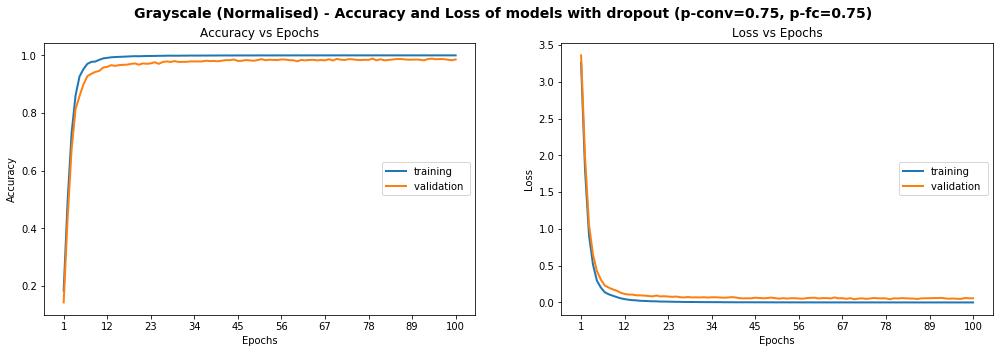

In [15]:
#### plot the training results
metrics = [MC_3x3_25_Training_Metrics, MC_3x3_25_Validation_Metrics]
lbs = ["training", "validation "]
plot_model_results(metrics, [2, 1], lbs, ["Epochs", "Epochs"], ["Accuracy", "Loss"], 
                   ["Accuracy vs Epochs", 
                    "Loss vs Epochs"],
                   "Grayscale (Normalised) - Accuracy and Loss of models with dropout (p-conv=0.75, p-fc=0.75)"
                    , fig_size=(17, 5))

---
## Prediction and Testing on New Images

In the last section, we download five new traffic sign images from the internet and predict their corresponding classes using our trained model. We see that our trained model successfully classifies them.

### 1 Load and Display new Testing Images

In [16]:
#### load the new images and do the preprocessing
testing_image_path = "testing-images/"
testing_image = load_images(testing_image_path)
testing_image_grayscale = np.asarray(list(map(lambda img: grayscale(img), testing_image)))
testing_image_grayscale = np.reshape(testing_image_grayscale, (testing_image_grayscale.shape[0], 32, 32, 1))

In [17]:
#### create the corresponding labels for the new images
testing_image_label = np.array([25, 14, 2, 9, 16])
testing_image_label_to_name = class_to_name(testing_image_label, sign_names)
testing_image_label_to_name

['Road work',
 'Stop',
 'Speed limit (50km/h)',
 'No passing',
 'Vehicles over 3.5 metric tons prohibited']

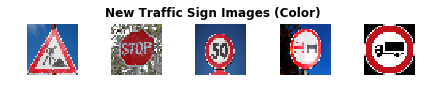

In [18]:
#### visual the new images
show_image_list(testing_image, testing_image_label_to_name, "New Traffic Sign Images (Color)", cols=len(testing_image), 
                fig_size=(6,6), show_ticks=False)

### 2 Image Prediction

In [19]:
#### predict on the new images using our trained model
testing_image_grayscale_normalized = standard_normalization(testing_image_grayscale, x_train_grayscale_normalized)
predictions = ME_Grayscale_Normalized_3x3_25.predict(testing_image_grayscale_normalized)
predictions

INFO:tensorflow:Restoring parameters from ./models/SOLeNet_Grayscale_Normalized_3x3_Dropout_0.25.chkpt


array([25, 14,  2,  9, 16])

In [20]:
#### test the accurarcy of our model on new images
accurarcy = np.sum(testing_image_label == predictions) / len(predictions)
print("[Grayscale Normalised] Predictional accuracy on new images: {0}%".format(accurarcy * 100))

[Grayscale Normalised] Predictional accuracy on new images: 100.0%


---
# Conclusion

In this project, we coupled the Machine Learning skills we learned in class with Deep Learning skills to classify traffic signs in Autonomous Vehicles. We employed different pre-processing and regularization techniques such as standard normalization, image grayscale, dropout, and reached 98% accuracy on testing dataset with our model.

It was very enjoyable to gain experience in Tensorflow, along with the other libraries we used extensively in our Machine Learning class. This project reinforced our knowledge in Machine Learning as well as our intuition about Deep Learning in the coming future.

### Reference
[1] [Udacity Self-Driving Car Engineer Nanodegrees](https://eu.udacity.com/course/self-driving-car-engineer-nanodegree--nd013), Udacity

[2] [Traffic Sign Recognition with Multi-Scale Convolutional Networks](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf), Pierre Sermanet and Yann LeCun

[3] [Dropout: A Simple Way to Prevent Neural Networks from Overfitting](http://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf), Nitish Srivastava, Geoffrey Hinton and etc.

[4] [Recognising Traffic Signs With 98% Accuracy Using Deep Learning](https://towardsdatascience.com/recognizing-traffic-signs-with-over-98-accuracy-using-deep-learning-86737aedc2ab), Eddie Forson